In [1]:
# Load libraries
import numpy as np
import pandas as pd

from timeit import default_timer

from sklearn.model_selection import train_test_split

# Support Vector Regressor

## Intuition

- It is a regressor model in which the objective is to build an optimal **hyperplane**.


- The optimization problem to be solved by SVR is analogous to Ridge Regression but changing the cost function, 𝑙 ((𝑦_𝑖) ̂, 𝑦_𝑦).

![imagen.png](attachment:imagen.png)

where $\lambda = \frac{1}{C}$


- The cost function, 𝑙 ((𝑦_𝑖) ̂, 𝑦_𝑖), used in SVR is called ε-insensitive.

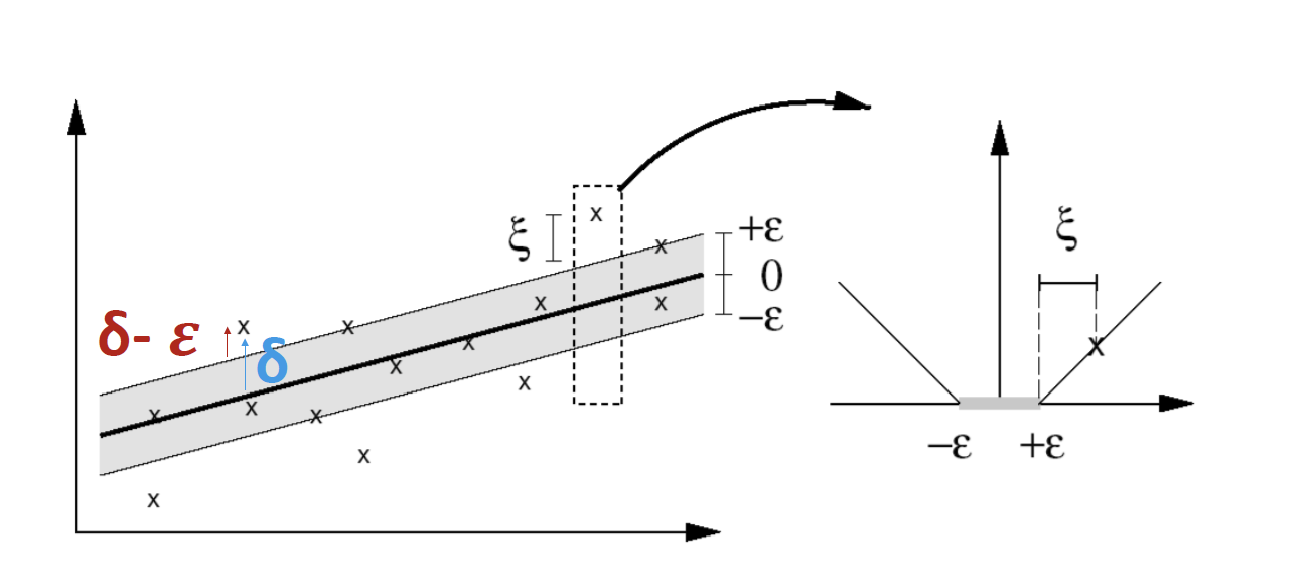

ε is a new Hyperparameter to optimize, only necessary in regression problems.

- The solution to the optimization problem of SVMs is guaranteed to **exist** and be **unique**.


- Existence is guaranteed by being the function to minimize quadratic.


- Furthermore, the uniqueness of the solution is also certain because it is a convex optimization problem.


- This is one of the main advantages of SVMs compared to models such as ANN

## Key Hyperparameters

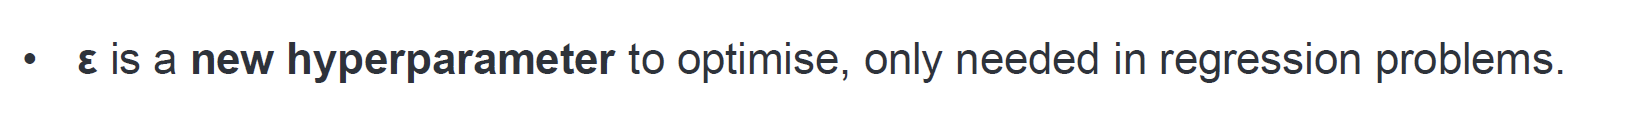

Cherkassky estimation for this new hyperparameter is

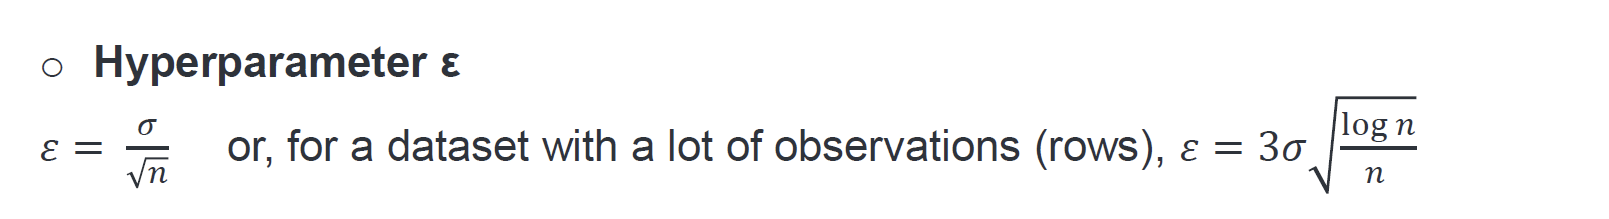

In [2]:
# [1] Import model
from sklearn.svm import SVR as model_constructor

## Data

Boston housing is the new iris.

In [3]:
from sklearn.datasets import fetch_california_housing as load_data

In [4]:
dat = load_data()
X = pd.DataFrame(dat.data)
X.columns = dat.feature_names
y = dat.target
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
perc_values = [0.7, 0.15, 0.15]
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

## Grid Search

Although there are no rules that define the optimal SVM hyperparameter for a particular problem, **Cherkassky** proposed a statistical solution that takes into account the distribution and volume of the problem data.

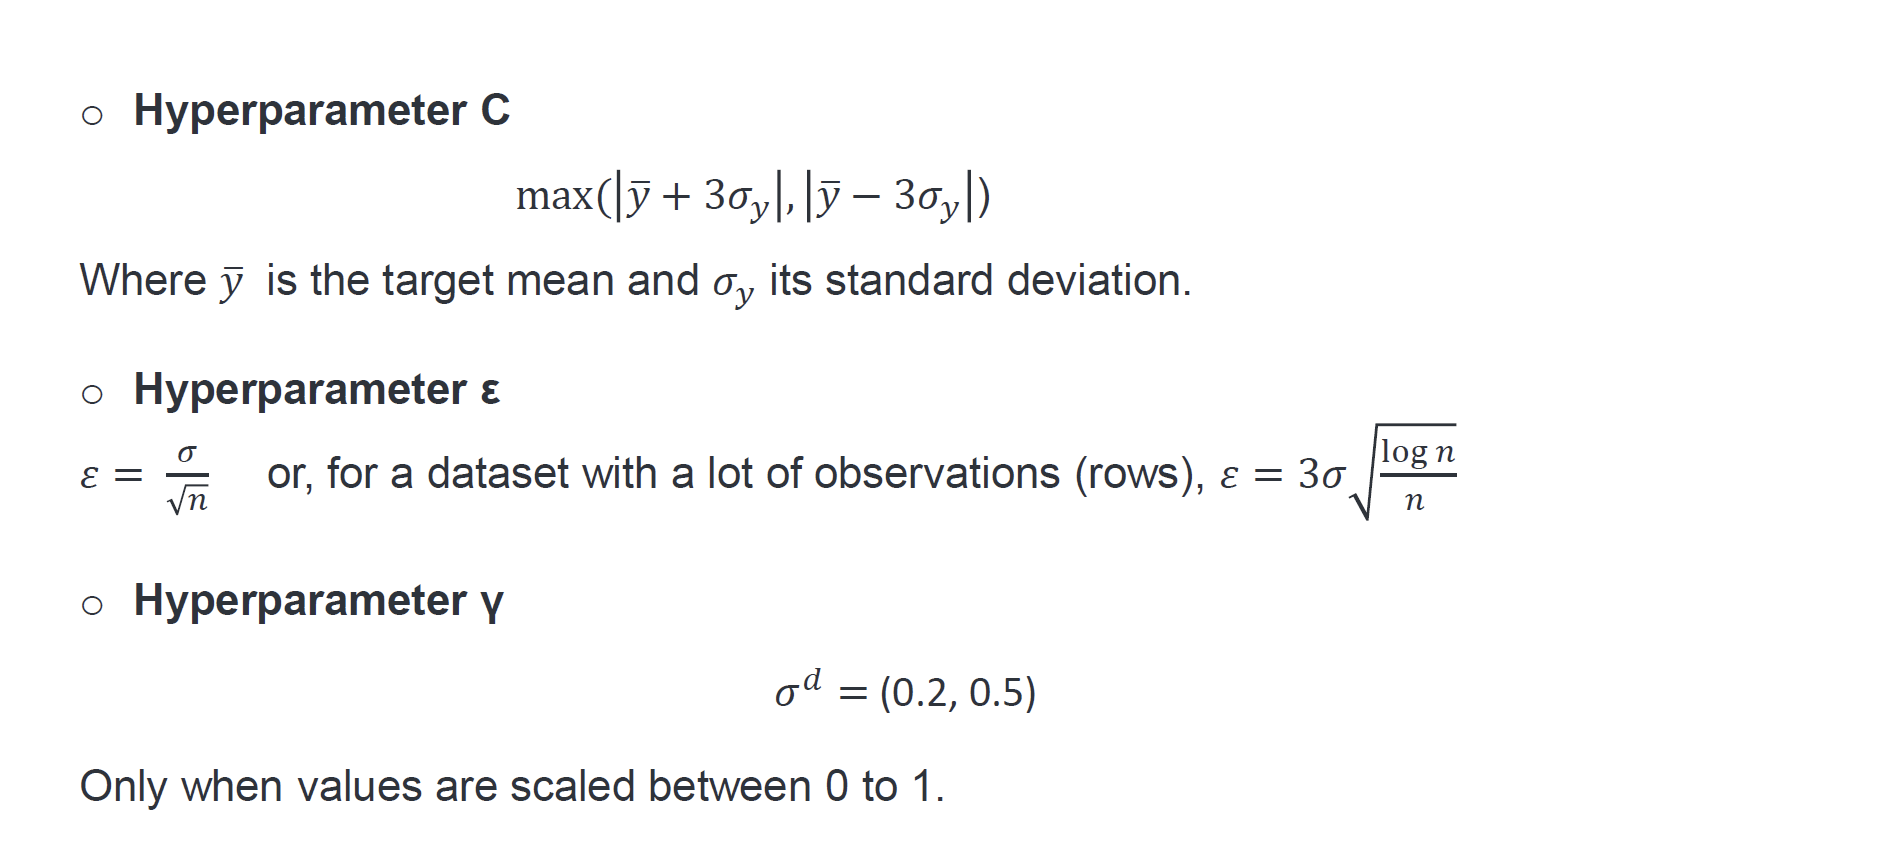

In [ ]:
d = X_train.shape[1]
m = np.mean(y_train)
s = np.std(y_train);

In [ ]:
C_cherk = np.max([np.abs(m + 3*s),np.abs(m - 3*s)]);
gamma_cherk = np.power(0.2, 1/d)
eps_cherk = FILL

Let's define the grid we will be using.

In [ ]:
# SVM
C_values = [1e-03, C_cherk, 1e03];
gamma_values = [1e-03, gamma_cherk, 1e03];
epsilon_values = [1e-03, eps_cherk, 1e03];

params_grid = {'C': C_values,
               'gamma': gamma_values,
               'epsilon': epsilon_values}

Get total number of combinations.

In [ ]:
n = len(params_grid['C'])*len(params_grid['gamma'])*len(params_grid['epsilon'])
print(str(n)+ ' iterations of SVR')

27 iterations of SVR


We will be using **MAPE** as evaluation metric.

In [ ]:
# 2) Import metric
from sklearn.metrics import mean_absolute_percentage_error as metric

### Using a Fixed Validation Set

In [ ]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('C',
                                       'gamma',
                                       'epsilon',
                                       'mape_train',
                                       'mape_val',
                                       'time'))

for C in params_grid['C']:
    for gamma in params_grid['gamma']:
        for epsilon in params_grid['epsilon']:

                    # Start time
                    start_time = default_timer()

                    # Print trace
                    print('Iteracion = ' + str(num_iter))

                    # [3] Define model
                    model = model_constructor(C = C,
                                              gamma = gamma,
                                              epsilon = epsilon) # No Probability = True!!!

                    # [4] Train model
                    model.fit(X_train, y_train)

                    # [5] Predict
                    pred_train = model.predict(X_train) # predict!
                    pred_val = model.predict(X_val) # predict!

                    # [6] Compute metric
                    metric_train = metric(y_train, pred_train)
                    metric_val = metric(y_val, pred_val)

                    # Computational time
                    time = default_timer() - start_time

                    # print error
                    print('MAPE train = %.2f - MAPE validation = %.2f. Time spend = %.2f.'
                          % (metric_train, metric_val, time))

                    # Save iteration results
                    grid_results.loc[num_iter]=[C,
                                                gamma,
                                                epsilon,
                                                metric_train,
                                                metric_val,
                                                time]
                    num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values))

Iteracion = 1
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.08.
Iteracion = 2
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.06.
Iteracion = 3
MAPE train = 0.54 - MAPE validation = 0.53. Time spend = 0.00.
Iteracion = 4
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.10.
Iteracion = 5
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.08.
Iteracion = 6
MAPE train = 0.54 - MAPE validation = 0.53. Time spend = 0.00.
Iteracion = 7
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.09.
Iteracion = 8
MAPE train = 0.33 - MAPE validation = 0.31. Time spend = 0.08.
Iteracion = 9
MAPE train = 0.54 - MAPE validation = 0.53. Time spend = 0.00.
Iteracion = 10
MAPE train = 0.21 - MAPE validation = 0.20. Time spend = 0.07.
Iteracion = 11
MAPE train = 0.21 - MAPE validation = 0.20. Time spend = 0.06.
Iteracion = 12
MAPE train = 0.54 - MAPE validation = 0.53. Time spend = 0.00.
Iteracion = 13
MAPE train = 0.28 - MAPE validation = 0.31. Time spend = 0

Check results

In [ ]:
grid_results

,C,gamma,epsilon,mape_train,mape_val,time
1,0.001,0.001,0.001,0.328817,0.309282,0.078593
2,0.001,0.001,1.000,0.330572,0.311026,0.063750
3,0.001,0.001,1000.000,0.543241,0.530020,0.003907
4,0.001,1.000,0.001,0.329071,0.309564,0.101564
5,0.001,1.000,1.000,0.330696,0.311187,0.078738
6,0.001,1.000,1000.000,0.543241,0.530020,0.002818
7,0.001,1000.000,0.001,0.329071,0.309564,0.091393
8,0.001,1000.000,1.000,0.330696,0.311187,0.083709
9,0.001,1000.000,1000.000,0.543241,0.530020,0.002567
10,1.000,0.001,0.001,0.210563,0.196867,0.071819


Massive difference in terms of metric. **SVM is very sensitive to choice of hyperparameters**.

Let's select the best model.

In [ ]:
grid_results = grid_results.sort_values(by = ['mape_val', 'mape_train', 'time'], ascending = [True, True, True])
grid_results

,C,gamma,epsilon,mape_train,mape_val,time
20,1000.000,0.001,1.000,0.050963,0.188537,0.166062
10,1.000,0.001,0.001,0.210563,0.196867,0.071819
11,1.000,0.001,1.000,0.213360,0.198607,0.055816
19,1000.000,0.001,0.001,0.010419,0.208203,0.417474
1,0.001,0.001,0.001,0.328817,0.309282,0.078593
4,0.001,1.000,0.001,0.329071,0.309564,0.101564
7,0.001,1000.000,0.001,0.329071,0.309564,0.091393
13,1.000,1.000,0.001,0.280231,0.310285,0.104145
16,1.000,1000.000,0.001,0.280276,0.310342,0.105425
2,0.001,0.001,1.000,0.330572,0.311026,0.063750


In [ ]:
best_model = grid_results.iloc[0]
best_model

C             1000.000000
gamma            0.001000
epsilon          1.000000
mape_train       0.050963
mape_val         0.188537
time             0.166062
Name: 20, dtype: float64

## Final Model

Validation has served its purpose, let's combine it with train to get more training data.

In [ ]:
print('Old train data size = ' + str(X_train.shape))
print('Old train target size = ' + str(y_train.shape))

# Combine train and validación
X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

print('New train data size = ' + str(X_train.shape))
print('New train target size = ' + str(y_train.shape))

Old train data size = (354, 13)
Old train target size = (354,)
New train data size = (430, 13)
New train target size = (430,)


In [ ]:
# [3] Define model
model = model_constructor(C = best_model.C,
                          gamma = best_model.gamma,
                          epsilon = best_model.epsilon) # No probability = True!!!

# [4] Train model
model.fit(X_train, y_train)

# [5] Predict
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# [6] Compute metric
metric_train = metric(y_train, pred_train)
metric_test = metric(y_test, pred_test)



In [ ]:
# print error
print('MAPE train = %.2f - MAPE test = %.2f'
      % (metric_train, metric_test))

MAPE train = 0.05 - MAPE test = 0.19
